<a href="https://colab.research.google.com/github/hammadshah18/MachineLearning/blob/main/SVM_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Test Accuracy: 0.95


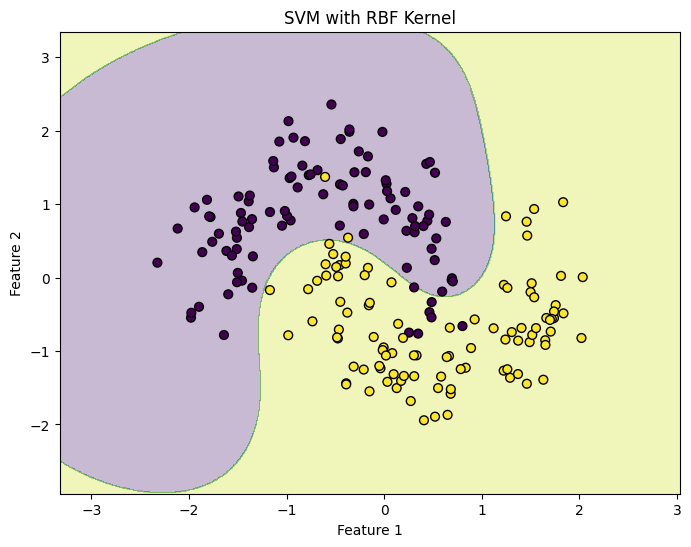

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic dataset (make_moons gives non-linearly separable data)
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=42)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (very important for SVMs!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # you can change kernel='linear' too
model.fit(X_train_scaled, y_train)

# 5. Evaluate accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# 6. Visualization function
def plot_decision_boundary(model, X, y, title="SVM Decision Boundary"):
    X = scaler.transform(X)  # ensure scaled
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 7. Visualize
plot_decision_boundary(model, X, y, title="SVM with RBF Kernel")


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [8]:
x,y=datasets.make_moons(n_samples=200,noise=0.2,random_state=42)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [59]:
svc=SVC(kernel='rbf',C=10.0,gamma='auto')

In [43]:
svc=SVC(kernel='linear',C=2.5,gamma='scale')

In [51]:
svc=SVC(kernel='poly',C=2.5,gamma='auto')

In [60]:
svc.fit(X_train_Scaled,y_train)

SVC(C=10.0, gamma='auto')

In [61]:
y_pred=svc.predict(X_test_Scaled)

In [28]:
from sklearn.metrics import accuracy_score

In [62]:
print('Accuracy Score',accuracy_score(y_test,y_pred))

Accuracy Score 0.975


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



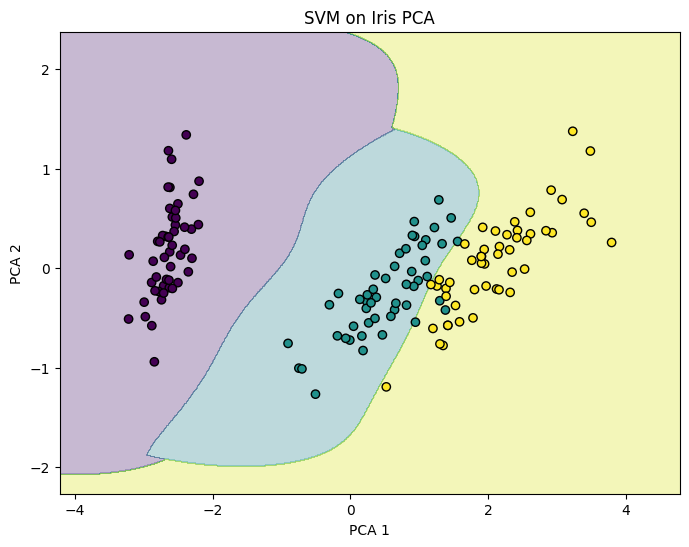

Time Taken 2.195258855819702


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Optional: Reduce to 2 features using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train basic SVM model
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
import time
start=time.time()

# Plot decision boundaries (2D only)
def plot_decision_boundary(model, X, y, title="SVM on Iris PCA"):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(X_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_decision_boundary(model, X_pca, y)
end=time.time()
print('Time Taken',end-start)


In [68]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
iris=datasets.load_iris()

In [71]:
x=iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [74]:
y=iris.target
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
pca=PCA(n_components=2)

In [76]:
x_pca=pca.fit_transform(x)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [80]:
scaler=StandardScaler()

In [87]:
x_pca_scaled=scaler.fit_transform(x_train)

In [88]:
y_scaled=scaler.transform(x_test)

In [89]:
svc=SVC(kernel='rbf',C=1,gamma='auto')
svc.fit(x_train,y_train)

SVC(C=1, gamma='auto')

In [90]:
y_pred=svc.predict(x_test)

In [91]:
print('Classification Report :',classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [92]:
from sklearn.metrics import accuracy_score

In [93]:
print('Accuracy_Score',accuracy_score(y_test,y_pred))

Accuracy_Score 1.0


In [94]:
param_grid={
    'C':[1.0,1.5,2.0,2.5,3.0],
    'gamma':['scale','auto',0.1,0.01,0.001],
    'kernel':['linear','rbf','poly']


}

In [95]:
grid=GridSearchCV(estimator=SVC(),param_grid=param_grid,verbose=3,n_jobs=-1,cv=10)

In [96]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5, 3.0],
                         'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [103]:
print('Best_paramters',grid.best_params_)

Best_paramters {'C': 2.5, 'gamma': 'scale', 'kernel': 'linear'}


In [105]:
print('best_Score',grid.best_score_)

best_Score 0.9666666666666666
